<a href="https://colab.research.google.com/github/Stronglight0627/PilGi/blob/main/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%EC%86%90%EC%8B%A4%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#데이터 전처리
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
#SGDClassifier
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=20, random_state=42) #max_iter(epochs)반복횟수 10일때보다는 정확도가높다.
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

#이전 학습경과를 버리고 다시 훈련
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.6134453781512605
0.525
0.8823529411764706
0.9


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


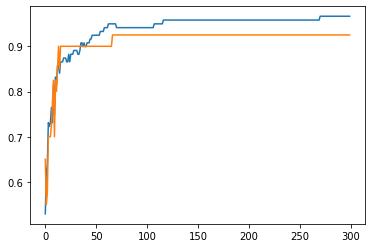

In [7]:
#epochs 과대/과소 적합
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = [] #score기록용 list
test_score = []
classes = np.unique(train_target)

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    #partial_fit의 classes=classes 옵션
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [8]:
#그래프를보면 epochs를 100정도로 주는게 적합하다고 판단할 수 있다.

sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [9]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
#hinge는 (SVM / Support Vector Machine)알고리즘을 위한 손실 함수
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
